# **Simple Linear Regression**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [73]:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)

In [74]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [75]:
ds.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [76]:
ds.shape

(25, 2)

In [77]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


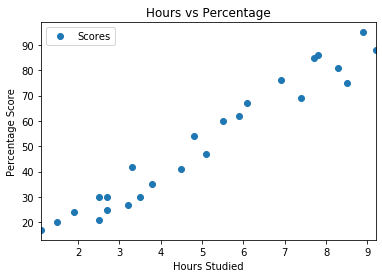

In [78]:
ds.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

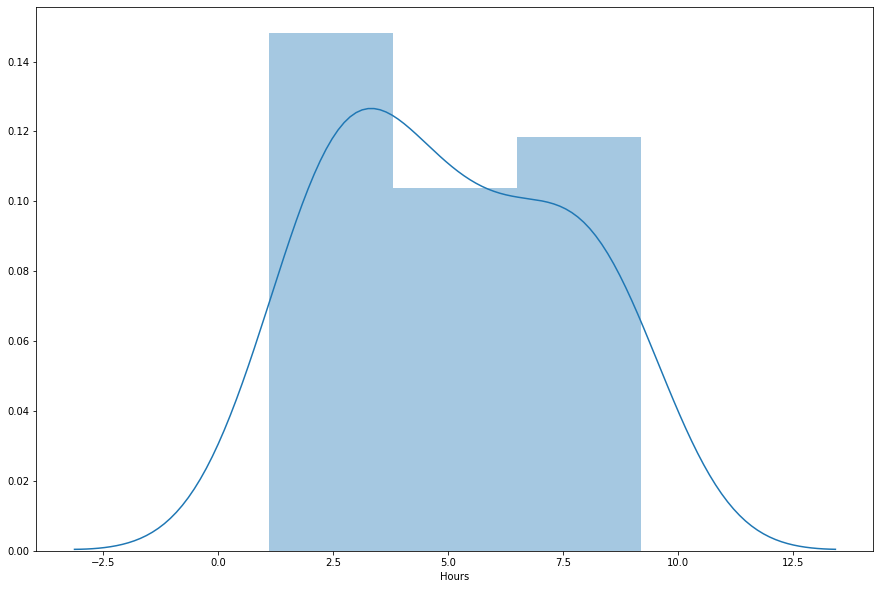

In [79]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(ds['Hours'])
#seabornInstance.distplot(ds['Scores'])

In [80]:
X = ds['Hours'].values.reshape(-1,1)
y = ds['Scores'].values.reshape(-1,1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
print(model.intercept_)

[2.01816004]


In [84]:
print(model.coef_)

[[9.91065648]]


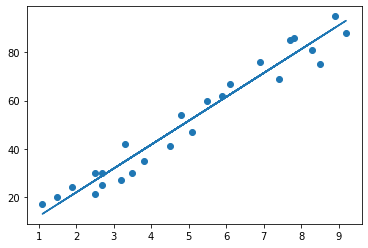

In [85]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [86]:
y_pred = model.predict(X_test)

In [87]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


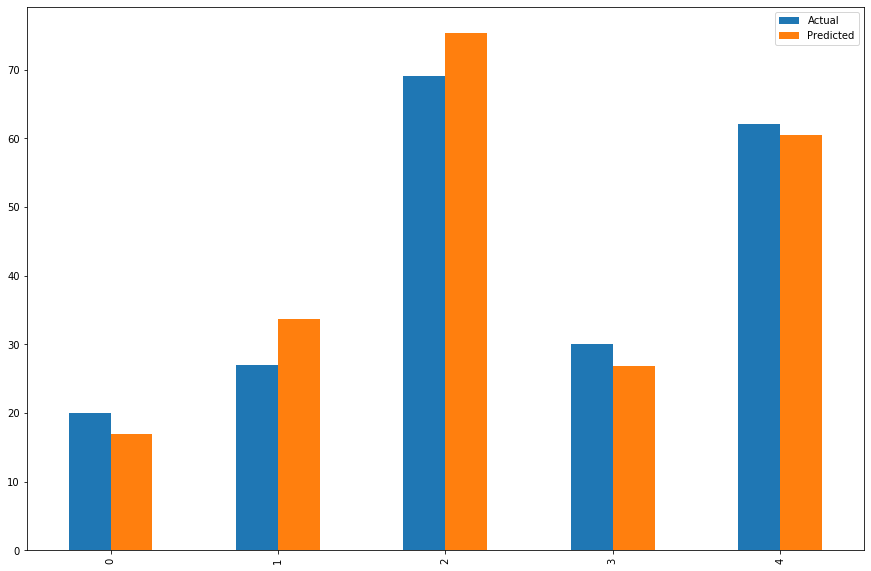

In [88]:
df1 = df
df1.plot(kind='bar',figsize=(15,10))
plt.show()

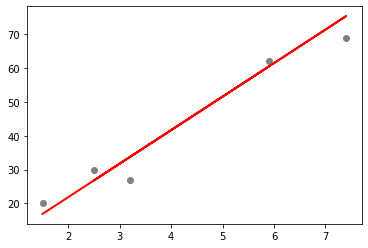

In [89]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [91]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
predection = model.predict(hours)
print("No of Hours = ",hours[0][0])
print("Predicted Score = ",predection[0][0])

No of Hours =  9.25
Predicted Score =  93.69173248737538
